In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
    
import sys 
sys.path.insert(0, '../src/')

import warnings; warnings.simplefilter('ignore')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import galhalo
import jsm_stats

### creating the subhalo mass functions

saving the accretion masses!


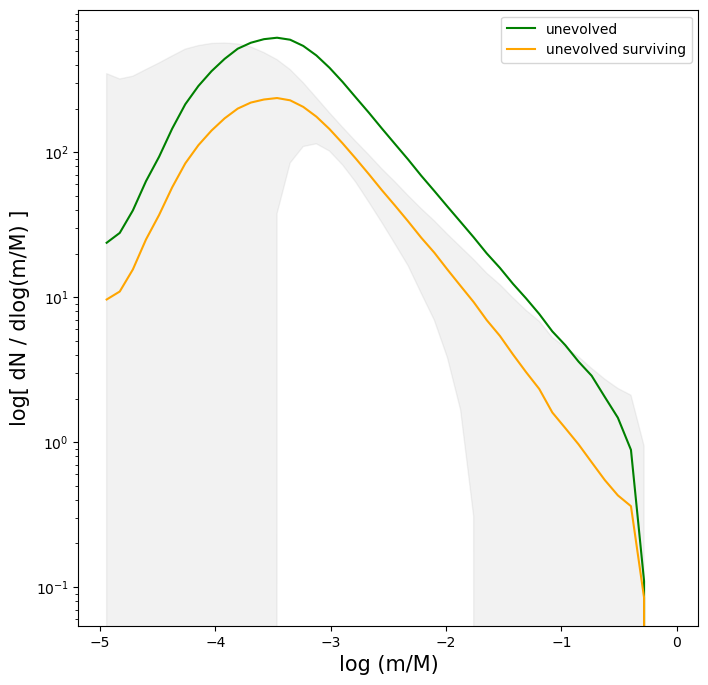

In [3]:
Nplease = jsm_halopull.MassMat("../../data/cross_host/pull_try/", Nsamp=100, Mres=-4, phimin=-5)

#np.save("../../data/Nsaga_Samples/10/jsm_MCMC.npy", N10.acc_surv_lgMh_mat)

saving the accretion masses!


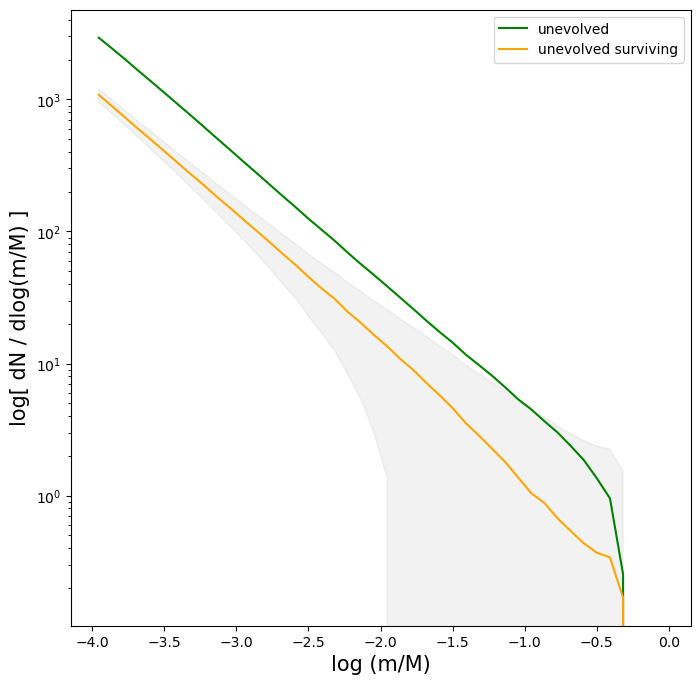

In [4]:
Nideal = jsm_halopull.MassMat("../../data/MW-analog/meta_data_psi4/", Nsamp=100, Mres=-4, phimin=-4)

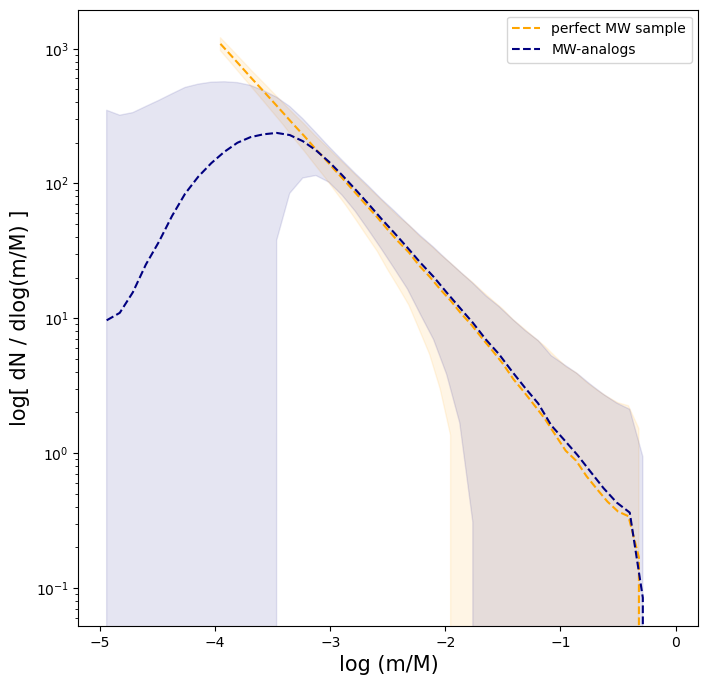

In [8]:
plt.figure(figsize=(8, 8))

plt.plot(Nideal.phi_bincenters, Nideal.acc_surv_SHMF_werr[0], label="perfect MW sample", color="orange", ls="--")
plt.fill_between(Nideal.phi_bincenters, y1=Nideal.acc_surv_SHMF_werr[0]-Nideal.acc_surv_SHMF_werr[1], y2=Nideal.acc_surv_SHMF_werr[0]+Nideal.acc_surv_SHMF_werr[1], alpha=0.1, color="orange")


plt.plot(Nplease.phi_bincenters, Nplease.acc_surv_SHMF_werr[0], label="MW-analogs", color="navy", ls="--")
plt.fill_between(Nplease.phi_bincenters, y1=Nplease.acc_surv_SHMF_werr[0]-Nplease.acc_surv_SHMF_werr[1], y2=Nplease.acc_surv_SHMF_werr[0]+Nplease.acc_surv_SHMF_werr[1], alpha=0.1, color="navy")

plt.yscale("log")
plt.xlabel("log (m/M)", fontsize=15)
plt.ylabel("log[ dN / dlog(m/M) ]", fontsize=15)
plt.legend()
plt.show()

### working with RP17 SHMR

In [9]:
masssepctrum = np.load("../../data/cross_host/pull_try/jsm_MCMC.npy")
bigstats = galhalo.lgMs_RP17(np.vstack(masssepctrum))
big = jsm_stats.SatStats(bigstats)
big.CSMF()

In [11]:
analogs = np.load("../../data/MW-analog/meta_data_psi4/jsm_MCMC.npy")
smallstats = galhalo.lgMs_RP17(np.vstack(analogs))
small = jsm_stats.SatStats(smallstats)
small.CSMF()

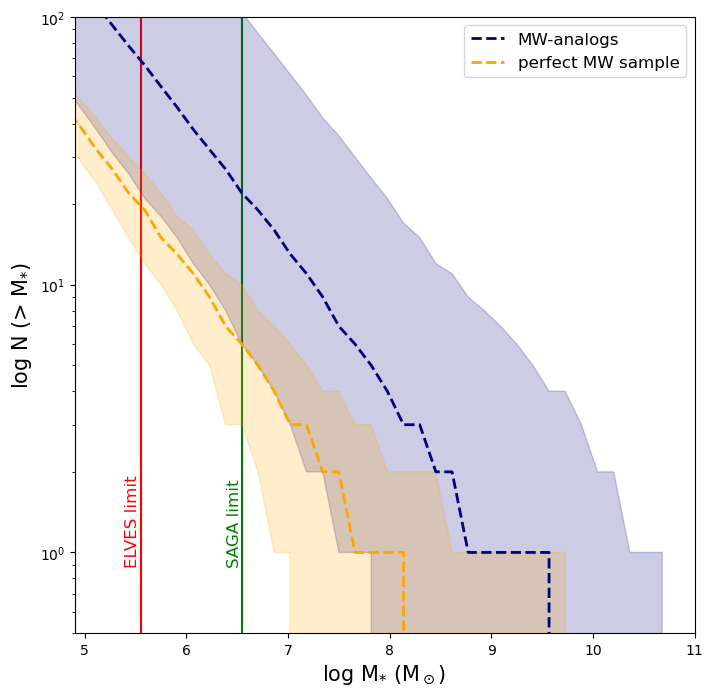

In [12]:
plt.figure(figsize=(8, 8))

plt.axvline(6.55, zorder=1, color="green")
plt.text(6.4, 0.9, "SAGA limit", rotation=90, color="green", fontsize=12)
plt.axvline(5.55, zorder=1, color="red")
plt.text(5.4, 0.9, "ELVES limit", rotation=90, color="red", fontsize=12)

plt.plot(big.mass_bins, big.quant[1], color="navy", lw=2, ls="--", label="MW-analogs")
plt.fill_between(big.mass_bins, y1=big.quant[0], y2=big.quant[2], alpha=0.2, color="navy")

plt.plot(small.mass_bins, small.quant[1], color="orange", lw=2, ls="--", label="perfect MW sample")
plt.fill_between(small.mass_bins, y1=small.quant[0], y2=small.quant[2], alpha=0.2, color="orange")

plt.legend(fontsize=12)
plt.yscale("log")
plt.xlabel("log M$_{*}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> M$_{*}$)", fontsize=15)
plt.xlim(4.9, 11)
plt.ylim(0.5,10**2)
plt.show()

In [13]:
big = jsm_stats.SatStats(bigstats[400:500])
big.CSMF()

In [14]:
small = jsm_stats.SatStats(smallstats[400:500])
small.CSMF()

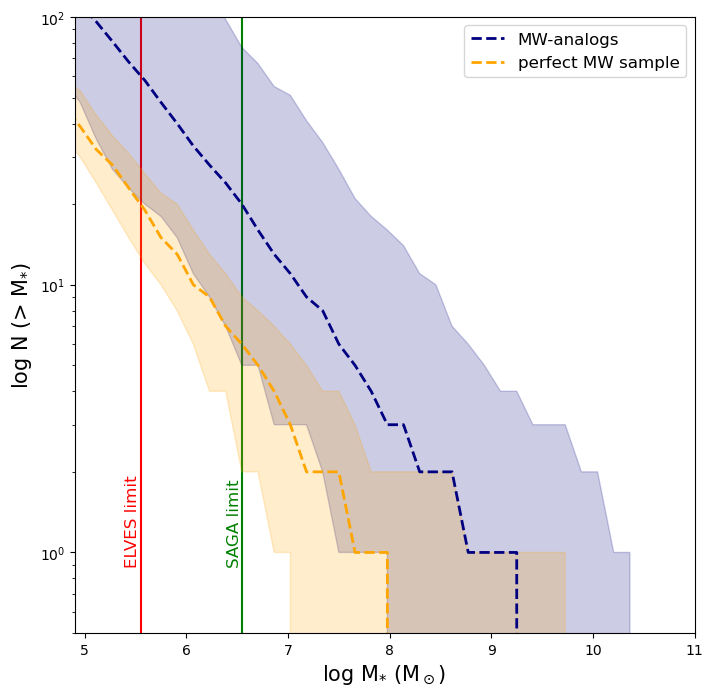

: 

In [15]:
plt.figure(figsize=(8, 8))

plt.axvline(6.55, zorder=1, color="green")
plt.text(6.4, 0.9, "SAGA limit", rotation=90, color="green", fontsize=12)
plt.axvline(5.55, zorder=1, color="red")
plt.text(5.4, 0.9, "ELVES limit", rotation=90, color="red", fontsize=12)

plt.plot(big.mass_bins, big.quant[1], color="navy", lw=2, ls="--", label="MW-analogs")
plt.fill_between(big.mass_bins, y1=big.quant[0], y2=big.quant[2], alpha=0.2, color="navy")

plt.plot(small.mass_bins, small.quant[1], color="orange", lw=2, ls="--", label="perfect MW sample")
plt.fill_between(small.mass_bins, y1=small.quant[0], y2=small.quant[2], alpha=0.2, color="orange")

plt.legend(fontsize=12)
plt.yscale("log")
plt.xlabel("log M$_{*}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> M$_{*}$)", fontsize=15)
plt.xlim(4.9, 11)
plt.ylim(0.5,10**2)
plt.show()